In [1]:
import pandas as pd
import numpy as np
import glob
import requests
import json
import tldextract
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from gensim.models import CoherenceModel
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import gensim
from gensim import corpora, models
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/meftahzi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
relevant= ["bbc.co.uk/news/",
"Ablink.editorial.theguardian.com",
"theguardian.com/news/",
"theguardian.com/world/",
"theguardian.com/commentisfree/",
"theguardian.com/us-news/",
"theguardian.com/uk-news/",
"theguardian.com/politics/",
"theguardian.com/education/",
"theguardian.com/society/",
"theguardian.com/science/",
"theguardian.com/business/",
"theguardian.com/money/",
"theguardian.com/sport/",
"theguardian.com/australia-news/",
"theguardian.com/travel/",
"theguardian.com/technology/",
"theguardian.com/commentisfree/",
"dailymail.co.uk/news/",
"dailymail.co.uk/columnists/",
"dailymail.co.uk/debate/",
"dailymail.co.uk/femail/",
"dailymail.co.uk/health/",
"dailymail.co.uk/money/",
"dailymail.co.uk/sport/",
"dailymail.co.uk/travel/",
"dailymail.co.uk/tvshowbiz/",
"news.sky.com/story/",
"thesun.co.uk/fabulous/",
"thesun.co.uk/money/",
"thesun.co.uk/news/",
"thesun.co.uk/sport/",
"thesun.co.uk/travel/",
"thesun.co.uk/tech/",
"www.telegraph.co.uk/politics/",
"www.telegraph.co.uk/news/",
"express.co.uk",
"metro.co.uk",
"itv.com/news",
"independent.co.uk/news",
"thetimes.co.uk/article",
"www.channel4.com/news",
"inews.co.uk/news",
"thetelegraphandargus.co.uk/news",
"nytimes.com/20",
"standard.co.uk/news",
"kentonline.co.uk",
"ft.com/content",
"eveningtimes.co.uk/news",
"eveningtimes.co.uk/content"]

In [3]:
news = pd.DataFrame()
DATA_FILES = ['uk/newspaper.json']
for filepath in DATA_FILES:
    current_news = pd.read_json(filepath, lines=True)
    current_news['country'] = filepath[:2]
    news = news.append(current_news)
    

news.reset_index(inplace=True, drop=True)

In [4]:
media_portals= news[(news['meta_lang'] == 'en') | (news['meta_lang'].isnull())] #select only articles with 'en' meta_lang or with empty

In [5]:
media_portals=media_portals[media_portals.url.str.contains('|'.join(relevant))]

In [6]:
media_portals=media_portals[media_portals["url"].str.contains("express.co.uk/showbiz|discountcode.metro.co.uk|Link.news.metro.co.uk|www.metro.co.uk|api.metro.co.uk")==False]
media_portals

,title,text,authors,imgs,movies,meta_lang,meta_keywords,htmlfile,url,error,country
1,LIVE: NZ terror attacks - Gun law reforms with...,Image:\n\nA man lays flowers for victims of th...,None,[https://e3.365dm.com/19/03/768x432/skynews-ne...,None,en,[],GER_2019-03-15_71_web_page.html,news.sky.com/story/live-significant-number-kil...,NaN,uk
7,Australian senator blames immigration for mosq...,An Australian senator has provoked outrage aft...,[Jane Wharton],[https://sb.scorecardresearch.com/p?c1=2&c2=60...,None,en,[],GER_2019-03-15_1075_web_page.html,metro.co.uk/2019/03/15/australian-senator-blam...,NaN,uk
8,Australian senator blames immigration for mosq...,An Australian senator has provoked outrage aft...,[Jane Wharton],[https://sb.scorecardresearch.com/p?c1=2&c2=60...,None,en,[],GER_2019-03-15_1076_web_page.html,metro.co.uk/2019/03/15/australian-senator-blam...,NaN,uk
20,Christchurch shootings: 49 dead in New Zealand...,Media playback is unsupported on your device M...,None,[http://ssc.api.bbc.com/?c1=2&c2=19293874&ns_s...,None,en,[],GER_2019-03-15_1563_web_page.html,www.bbc.co.uk/news/world-asia-47578798,NaN,uk
21,David Steel suspended by Liberal Democrats ove...,Image copyright Getty Images Image caption Lor...,None,[https://ichef.bbci.co.uk/news/320/cpsprodpb/1...,None,en,[],GER_2019-03-15_1564_web_page.html,www.bbc.co.uk/news/uk-scotland-scotland-politi...,NaN,uk
...,...,...,...,...,...,...,...,...,...,...,...
120568,Conservative leadership field slims to six as ...,Conservative leadership field slims to six as ...,"[Greg Heffer, Political Reporter]",[https://e3.365dm.com/19/06/768x432/skynews-ma...,None,en,[],GER_2019-06-15_1622_mobile_.html,news.sky.com/story/conservative-leadership-fie...,NaN,uk
120569,'Glazed ring' donut jokes gets city boss from ...,Sign me up for news alerts\n\nA city boss has ...,None,"[http://fox13now.com/1x1.gif, http://fox13now....",None,en,"[Business News, Quirky, Kent, People & Employm...",GER_2019-06-15_1623_mobile_.html,www.kentonline.co.uk/kent/news/boss-suspended-...,NaN,uk
120576,Former Arsenal footballer Ian Wright taught hi...,Ian Wright has opened up about warning his chi...,[Rishma Dosani],[https://sb.scorecardresearch.com/p?c1=2&c2=60...,[https://www.youtube.com/embed/E7Cs9MJnwuI?ver...,en,[],GER_2019-06-15_2463_mobile_.html,metro.co.uk/2019/06/15/ian-wright-taught-child...,NaN,uk
120579,Amazon Echo price drops AGAIN as owners get a ...,Amazon Echo now gets voice calling from Vodafo...,[David Snelling],[https://cdn.images.express.co.uk/img/covers/7...,None,en,[],GER_2019-06-15_4600_mobile_.html,www.express.co.uk/life-style/science-technolog...,NaN,uk


In [7]:
media_portals.reset_index(inplace=True, drop=True)
media_portals

,title,text,authors,imgs,movies,meta_lang,meta_keywords,htmlfile,url,error,country
0,LIVE: NZ terror attacks - Gun law reforms with...,Image:\n\nA man lays flowers for victims of th...,None,[https://e3.365dm.com/19/03/768x432/skynews-ne...,None,en,[],GER_2019-03-15_71_web_page.html,news.sky.com/story/live-significant-number-kil...,NaN,uk
1,Australian senator blames immigration for mosq...,An Australian senator has provoked outrage aft...,[Jane Wharton],[https://sb.scorecardresearch.com/p?c1=2&c2=60...,None,en,[],GER_2019-03-15_1075_web_page.html,metro.co.uk/2019/03/15/australian-senator-blam...,NaN,uk
2,Australian senator blames immigration for mosq...,An Australian senator has provoked outrage aft...,[Jane Wharton],[https://sb.scorecardresearch.com/p?c1=2&c2=60...,None,en,[],GER_2019-03-15_1076_web_page.html,metro.co.uk/2019/03/15/australian-senator-blam...,NaN,uk
3,Christchurch shootings: 49 dead in New Zealand...,Media playback is unsupported on your device M...,None,[http://ssc.api.bbc.com/?c1=2&c2=19293874&ns_s...,None,en,[],GER_2019-03-15_1563_web_page.html,www.bbc.co.uk/news/world-asia-47578798,NaN,uk
4,David Steel suspended by Liberal Democrats ove...,Image copyright Getty Images Image caption Lor...,None,[https://ichef.bbci.co.uk/news/320/cpsprodpb/1...,None,en,[],GER_2019-03-15_1564_web_page.html,www.bbc.co.uk/news/uk-scotland-scotland-politi...,NaN,uk
...,...,...,...,...,...,...,...,...,...,...,...
40073,Conservative leadership field slims to six as ...,Conservative leadership field slims to six as ...,"[Greg Heffer, Political Reporter]",[https://e3.365dm.com/19/06/768x432/skynews-ma...,None,en,[],GER_2019-06-15_1622_mobile_.html,news.sky.com/story/conservative-leadership-fie...,NaN,uk
40074,'Glazed ring' donut jokes gets city boss from ...,Sign me up for news alerts\n\nA city boss has ...,None,"[http://fox13now.com/1x1.gif, http://fox13now....",None,en,"[Business News, Quirky, Kent, People & Employm...",GER_2019-06-15_1623_mobile_.html,www.kentonline.co.uk/kent/news/boss-suspended-...,NaN,uk
40075,Former Arsenal footballer Ian Wright taught hi...,Ian Wright has opened up about warning his chi...,[Rishma Dosani],[https://sb.scorecardresearch.com/p?c1=2&c2=60...,[https://www.youtube.com/embed/E7Cs9MJnwuI?ver...,en,[],GER_2019-06-15_2463_mobile_.html,metro.co.uk/2019/06/15/ian-wright-taught-child...,NaN,uk
40076,Amazon Echo price drops AGAIN as owners get a ...,Amazon Echo now gets voice calling from Vodafo...,[David Snelling],[https://cdn.images.express.co.uk/img/covers/7...,None,en,[],GER_2019-06-15_4600_mobile_.html,www.express.co.uk/life-style/science-technolog...,NaN,uk


In [8]:
media_portals['txt_counts'] = media_portals['text'].map(media_portals['text'].value_counts())
media_portals['title_counts'] = media_portals['title'].map(media_portals['title'].value_counts())

In [32]:
criteria=25
s=media_portals[media_portals['txt_counts']<=criteria]
print("Number of articles with text occurence less than "+ str(criteria) +" :" + str(len(s)))
s=media_portals[media_portals['title_counts']<=criteria]
print("Number of articles with title occurence less than "+ str(criteria) +" :" + str(len(s)))
s=media_portals[(media_portals['txt_counts']<=criteria) & (media_portals['title_counts']<=criteria)]
print("Number of articles with title and text occurence combined less than "+ str(criteria) +" :" + str(len(s)))
s.reset_index(inplace=True, drop=True)

Number of articles with text occurence less than 25 :36314
Number of articles with title occurence less than 25 :37252
Number of articles with title and text occurence combined less than 25 :36092


In [33]:
s=s.sample(n = 2000) 

In [34]:
a=s
a.drop_duplicates(subset='text', keep='first')

,title,text,authors,imgs,movies,meta_lang,meta_keywords,htmlfile,url,error,country,txt_counts,title_counts
28852,Spice Girls fans complain of ‘appalling’ sound...,It seems the Spice Girls are yet to perfect th...,[Alicia Adejobi],[https://sb.scorecardresearch.com/p?c1=2&c2=60...,None,en,[],GER_2019-05-28_95795_web_page.html,metro.co.uk/2019/05/27/spice-girls-fans-compla...,NaN,uk,1.0,1.0
7534,Brexit: Labour and Conservative talks end afte...,Image copyright EPA Image caption Labour's Sir...,None,[http://ssc.api.bbc.com/?c1=2&c2=19293874&ns_s...,None,en,[],GER_2019-04-04_5823_web_page.html,bbc.co.uk/news/uk-politics-47815599,NaN,uk,2.0,2.0
2248,Prestatyn GPs' warning over patients' social m...,Image copyright Google Image caption Park Hous...,None,[http://ssc.api.bbc.com/?c1=2&c2=19293874&ns_s...,None,en,[],GER_2019-03-21_22321_web_page.html,www.bbc.co.uk/news/uk-wales-47650964,NaN,uk,1.0,1.0
25397,"Niki Lauda, Austrian Formula 1 legend, dies at 70",Media playback is unsupported on your device M...,None,[https://a1.api.bbc.co.uk/hit.xiti?&col=1&from...,None,en,[],GER_2019-05-21_1973_web_page.html,www.bbc.co.uk/news/world-europe-48345660,NaN,uk,2.0,2.0
32867,Labour has dumped the working class for ‘victi...,I WAS watching Labour’s Foreign Affairs spokes...,[Rod Liddle],[http://www.facebook.com/tr?id=752905198150451...,None,en,[],GER_2019-06-07_248_mobile_.html,www.thesun.co.uk/news/9232812/labour-left-work...,NaN,uk,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29593,‘Mother slit 5-day-old girl’s throat because s...,"Hiralbahen Bhavsar, 29, reportedly posted this...",[Jacob Geanous],[https://i2.wp.com/metro.co.uk/wp-content/uplo...,None,en,[],GER_2019-05-31_49360_web_page.html,metro.co.uk/2019/05/06/mother-slit-5-day-old-g...,NaN,uk,1.0,1.0
7108,Police seize knife and drugs during operation ...,Two people have been arrested and a knife was ...,None,"[http://fox13now.com/1x1.gif, http://fox13now....",None,en,"[Crime, Kent, Tonbridge]",GER_2019-04-02_97690_web_page.html,kentonline.co.uk/tonbridge/news/drugs-and-knif...,NaN,uk,1.0,1.0
7371,"Entrepreneur raking in £10,000 a month says he...",A 28-year-old entrepreneur claims he no longer...,[Joel Adams For Mailonline],[https://i.dailymail.co.uk/1s/2019/07/23/16/16...,None,en,"[dailymail, news]",GER_2019-04-03_48911_web_page.html,www.dailymail.co.uk/news/article-6881487/Entre...,NaN,uk,1.0,1.0
35121,"Check NHS cancer, A&E, ops and mental health t...",The NHS is under severe pressure. Rising numbe...,None,[https://sb.scorecardresearch.com/p?c1=2&c2=17...,None,en,[],GER_2019-06-13_36787_web_page.html,www.bbc.co.uk/news/health-41483322#healthTrust...,NaN,uk,9.0,9.0


In [35]:
r_ignore_case = {
    'handle': r'\S+@\S+',
    'link': r'((visit|at)\s+)*(\S+).(com|org)((/|\S)*)',
    'money': r'\$\d*',
    'phone': r'(\d-)*(\d+-\d+-\d+)' ,
    'menu': r'(?<=•)[^•]*(?=•)'
}
r_set_case = {
    'photographer-credits': r'PHOTO(GRAPHER)*:(\s)*(([A-Z][A-Za-z]*)\s*){1,3}',
    'graphics': r'Graphic([^.])'
}

In [36]:
def filter_text(text):
    for regex in r_ignore_case:
        text = re.sub(regex, '', text, re.I)
    for regex in r_set_case:
        text = re.sub(regex, '', text)
    return text

In [37]:
stemmer = PorterStemmer()
def lemmatize_stemming(text):
    return [stemmer.stem(WordNetLemmatizer().lemmatize(word, pos='v')) for word in text]

In [38]:
def process_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    return text

In [39]:
url = "https://countwordsfree.com/stopwords/english/json"
response = pd.DataFrame(data = json.loads(requests.get(url).text))
SW = list(response['words'])
def remove_stopwords(text):
    return [word for word in text if not word in SW]

In [40]:
def clean_text(text):
    text = filter_text(text)
    text = process_text(text)
    text = remove_stopwords(text)
    text = lemmatize_stemming(text)
    return text

In [41]:
a['clean_text']=a['text'].apply(lambda x: clean_text(str(x)))

In [42]:
a['length']=a['clean_text'].apply(lambda x: len(x))

Text(0.5, 1.0, 'Distributon of number of words in the articles')

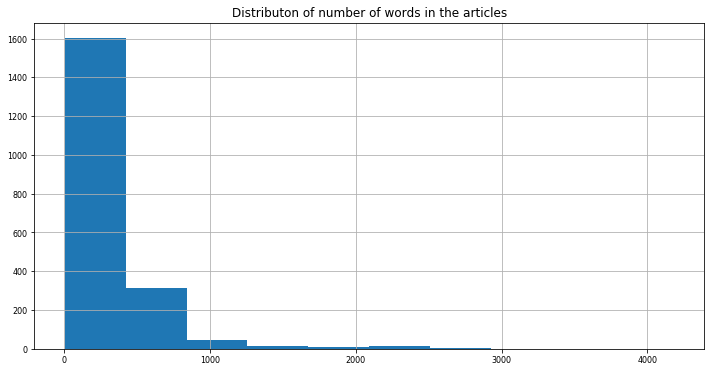

In [43]:
a['length'].hist(figsize=(12, 6), bins=10, xlabelsize=8, ylabelsize=8);
plt.title("Distributon of number of words in the articles")

In [44]:
data_lemmatized = a['clean_text']

In [52]:
data_lemmatized

28852    [spice, girl, perfect, sound, issu, pictur, tw...
7534     [imag, copyright, epa, imag, labour, sir, keir...
2248     [imag, copyright, googl, imag, park, hous, sur...
25397    [media, playback, unsupport, devic, media, vid...
32867    [watch, labour, foreign, affair, spokesman, em...
                               ...                        
29593    [hiralbahen, bhavsar, reportedli, post, photo,...
7108     [peopl, arrest, knife, seiz, teenag, oper, tra...
7371     [year, entrepreneur, claim, longer, work, teac...
35121    [nh, sever, pressur, rise, number, patient, ho...
20282    [year, ambul, dispatch, jd, sport, greater, ma...
Name: clean_text, Length: 2000, dtype: object

In [53]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Filter out words that occur less than 30 documents, or more than 50% of the documents.
id2word.filter_extremes(no_below=50, no_above=0.2)

# Create Corpus
texts = data_lemmatized

In [54]:
corpus = [id2word.doc2bow(text) for text in texts]

In [55]:
print('Number of unique tokens: %d' % len(id2word))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 1520
Number of documents: 2000


In [58]:
num=16
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                   id2word=id2word,
                                                   num_topics= num, 
                                                   random_state=100,
                                                   update_every=1,
                                                   chunksize=10,
                                                   passes=2,
                                                   alpha=[0.01]*num,
                                                   per_word_topics=True)
print("------------------------------------------------")
print("number of topics" , num)
#    print('\nPerplexity: ', lda_model.log_perplexity(corpus))
print(lda_model.print_topics())


------------------------------------------------
number of topics 16
[(0, '0.075*"star" + 0.047*"husband" + 0.041*"red" + 0.033*"royal" + 0.032*"wed" + 0.028*"actress" + 0.028*"babi" + 0.028*"mum" + 0.027*"friend" + 0.026*"love"'), (1, '0.029*"compani" + 0.026*"bbc" + 0.022*"busi" + 0.021*"issu" + 0.019*"april" + 0.019*"trade" + 0.019*"law" + 0.018*"protect" + 0.017*"decis" + 0.017*"cost"'), (2, '0.101*"eu" + 0.065*"brexit" + 0.045*"minist" + 0.040*"jeremi" + 0.036*"mp" + 0.036*"rule" + 0.028*"prime" + 0.028*"leader" + 0.024*"secretari" + 0.023*"custom"'), (3, '0.089*"children" + 0.063*"boy" + 0.059*"school" + 0.051*"mother" + 0.046*"parent" + 0.045*"son" + 0.045*"hospit" + 0.043*"father" + 0.040*"patient" + 0.030*"nh"'), (4, '0.052*"getti" + 0.047*"trump" + 0.044*"june" + 0.039*"court" + 0.037*"presid" + 0.030*"juli" + 0.019*"visit" + 0.018*"citi" + 0.017*"pari" + 0.016*"celebr"'), (5, '0.028*"women" + 0.017*"health" + 0.016*"bodi" + 0.015*"case" + 0.014*"ms" + 0.014*"feel" + 0.013*"d

In [59]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline


# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.102815  0.171928       1        1  18.218517
1     -0.166849  0.113450       2        1  10.714616
9      0.041388  0.183174       3        1   9.786073
4     -0.046303  0.099277       4        1   8.980828
2     -0.272608  0.024875       5        1   7.608535
12     0.170188  0.011620       6        1   7.144476
13     0.110521  0.014448       7        1   5.340150
0      0.249401 -0.003660       8        1   5.260980
11    -0.252627  0.075095       9        1   4.806768
10    -0.128434  0.052945      10        1   4.775244
6      0.189045  0.054026      11        1   4.013848
3      0.098445 -0.032198      12        1   3.877976
8      0.012755 -0.037981      13        1   3.157106
15     0.004701 -0.296272      14        1   3.040813
7     -0.083557 -0.192998      15        1   2.348394
14    -0.028880 -0.237731      16        1   0.925674, topic_info=        Term         Freq        Total Category  logprob  loglift
117       eu  2677.000000  2677.000000  Default  30.0000  30.0000
157    parti  2024.000000  2024.000000  Default  29.0000  29.0000
84    brexit  2156.000000  2156.000000  Default  28.0000  28.0000
206     vote  1739.000000  1739.000000  Default  27.0000  27.0000
186   servic  1369.000000  1369.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
988    doesn     0.087218     1.404007  Topic16 -10.5214   1.9037
945   suicid     0.087066     1.400882  Topic16 -10.5231   1.9042
892  concern     0.087149     1.407660  Topic16 -10.5222   1.9003
996     want     0.087254     1.420137  Topic16 -10.5210   1.8927
302     lose     0.112526   845.483093  Topic16 -10.2666  -4.2421

[711 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
253      11  0.291159    absolut
253      12  0.622478    absolut
253      16  0.080320    absolut
210       6  0.997897       abus
608       1  0.919410      accus
...     ...       ...        ...
209       8  0.239978      write
607      16  0.993618  yesterday
576       1  0.968489      young
576       3  0.003289      young
576      13  0.026309      young

[1143 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 10, 5, 3, 13, 14, 1, 12, 11, 7, 4, 9, 16, 8, 15])